<a href="https://colab.research.google.com/github/toskpl/dw_matrix_road_sing/blob/master/day4_part3_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""import bibliotek"""
import pandas as pd
import numpy as np


import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.utils import to_categorical

#do wizualizacjai krzywej uczenia sie
%load_ext tensorboard

import matplotlib.pyplot as plt

from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
cd '/content/drive/My Drive/Colab Notebooks/DW_Matrix/matrix_three/dw_matrix_road_sing'

/content/drive/My Drive/Colab Notebooks/DW_Matrix/matrix_three/dw_matrix_road_sing


In [0]:
"""wczytane danych z pliki typu pickle"""
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')


"""rozmiar zbioru danych"""
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((34799, 32, 32, 3), (34799,), (4410, 32, 32, 3), (4410,))

In [0]:
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:

"""transformacja jesli jest 1 to przypisz kategorie mozna uruchamiac wiele razy"""
if y_train.ndim == 1 : y_train = to_categorical(y_train)
if y_test.ndim == 1 : y_test = to_categorical(y_test)

In [0]:
y_train.shape,y_test.shape

((34799, 43), (4410, 43))

In [0]:
"""pomocniczne zmianne do modelu jako wesjcieowe - zachouwje rozmiary wektorow"""
input_shape = X_train.shape [1:]
num_classes = y_train.shape[1]

In [0]:
"""model CNN"""
model =Sequential([
         Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=input_shape ),
         Flatten(),
         Dense(num_classes,activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [0]:
#kompilacja modelu
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [0]:
#trenowanie modelu
model.fit(X_train,y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 9.4286 - accuracy: 0.7989


In [0]:
""""funckje pomocnicze"""
def gen_cnn_v1(input_shape,num_classes):
  return Sequential([
         Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=input_shape ),

         Flatten(),

         Dense(num_classes,activation='softmax')


])
  
def train_model(model, X_train,y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs",datetime.datetime.now().strftime("%Y-%m-%d-%H%M%S"))
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

  model.fit(X_train,
            y_train,
            batch_size = params_fit.get('batch_size',128),
            epochs = params_fit.get('epochs',5),
            verbose = params_fit.get('verbose',1),
            validation_data = params_fit.get('validation_data',(X_train,y_train)),
            callbacks = [tensorboard_callbacks]
  )

  return model

In [0]:
model = gen_cnn_v1(input_shape,num_classes)
model_trained = train_model(model,X_train,y_train)

Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 45.3148 - accuracy: 0.6862 - val_loss: 0.2586 - val_accuracy: 0.9356
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2455 - accuracy: 0.9407 - val_loss: 0.1227 - val_accuracy: 0.9684
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1306 - accuracy: 0.9668 - val_loss: 0.1369 - val_accuracy: 0.9632
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1272 - accuracy: 0.9675 - val_loss: 0.0797 - val_accuracy: 0.9810
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0848 - accuracy: 0.9791 - val_loss: 0.1024 - val_accuracy: 0.9779


In [0]:
#predykcja - prawdobodobieństwo ze znak nalezy do danej klasy
y_predict_prob = model_trained.predict(X_test)
y_predict_prob

array([[2.56761190e-08, 1.71514930e-05, 1.48696639e-03, ...,
        2.14174679e-06, 2.70647579e-05, 5.23966446e-05],
       [3.75652576e-08, 6.09255767e-05, 2.21613180e-02, ...,
        5.71146302e-06, 3.38850896e-06, 6.01855791e-05],
       [3.13302850e-09, 1.00631987e-05, 7.55718036e-04, ...,
        4.85518467e-06, 1.04529652e-04, 3.49495640e-05],
       ...,
       [1.99796204e-02, 2.66534649e-02, 1.85301956e-02, ...,
        2.68347654e-03, 1.12636313e-02, 1.10943485e-02],
       [1.29752327e-02, 6.54584449e-03, 1.03310682e-02, ...,
        2.85130553e-03, 1.48870274e-02, 1.26673444e-03],
       [8.09445884e-03, 1.10642724e-02, 1.21560674e-02, ...,
        8.65757524e-04, 7.51099922e-03, 6.43511675e-03]], dtype=float32)

Przykład


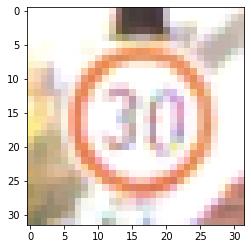

In [0]:
#przykladowy znak
plt.imshow(X_test[400])

In [0]:
#predykcja dla znaku 400
y_predict_prob[400]

array([9.9751806e-01, 2.4817614e-03, 1.4839673e-10, 6.6818998e-12,
       2.3844180e-07, 4.8587419e-09, 4.4217807e-14, 3.5391995e-12,
       4.6859218e-13, 3.3485503e-10, 1.5089003e-11, 4.6091781e-19,
       1.2457969e-13, 3.0869548e-13, 4.5286648e-16, 2.1946930e-10,
       8.6110352e-10, 1.3650481e-23, 2.0215234e-16, 1.1940951e-24,
       4.3677982e-18, 3.1866842e-20, 4.1346592e-23, 1.1196657e-18,
       1.0011314e-16, 3.5149664e-20, 1.0672401e-17, 1.9259854e-26,
       7.7997725e-15, 1.5608845e-17, 3.2352589e-22, 1.8757076e-20,
       6.4690367e-12, 1.1585414e-15, 9.3441703e-19, 2.0212174e-21,
       7.3080898e-29, 7.3851414e-26, 3.2637733e-27, 8.5607378e-34,
       1.8763774e-23, 5.2953053e-19, 1.9361757e-16], dtype=float32)

In [0]:
#suma prawdopodobwieństw = 1
np.sum ([9.9751806e-01, 2.4817614e-03, 1.4839673e-10, 6.6818998e-12,
       2.3844180e-07, 4.8587419e-09, 4.4217807e-14, 3.5391995e-12,
       4.6859218e-13, 3.3485503e-10, 1.5089003e-11, 4.6091781e-19,
       1.2457969e-13, 3.0869548e-13, 4.5286648e-16, 2.1946930e-10,
       8.6110352e-10, 1.3650481e-23, 2.0215234e-16, 1.1940951e-24,
       4.3677982e-18, 3.1866842e-20, 4.1346592e-23, 1.1196657e-18,
       1.0011314e-16, 3.5149664e-20, 1.0672401e-17, 1.9259854e-26,
       7.7997725e-15, 1.5608845e-17, 3.2352589e-22, 1.8757076e-20,
       6.4690367e-12, 1.1585414e-15, 9.3441703e-19, 2.0212174e-21,
       7.3080898e-29, 7.3851414e-26, 3.2637733e-27, 8.5607378e-34,
       1.8763774e-23, 5.2953053e-19, 1.9361757e-16])

1.0000000662971018

In [0]:
#labele znaków z csv
df = pd.read_csv('data/signamesad.csv')
lables_dict = df.to_dict()['b']
lables_dict

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [0]:
#model twierdzi ze 400 to znak Speed limit (20km/h)
lables_dict [ np.argmax(y_predict_prob[400])]

'Speed limit (20km/h)'

<BarContainer object of 43 artists>

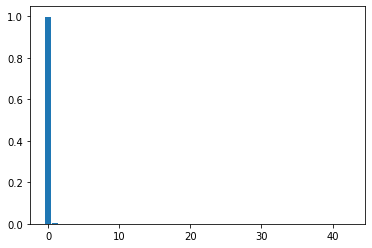

In [0]:
plt.bar(range(43),y_predict_prob[400])

In [0]:
lables_dict [1]

'Speed limit (30km/h)'

In [0]:
df = pd.read_csv('data/signamesad.csv')

lables_dict = df.to_dict()['b']

In [0]:
"""funckje pomocnicze"""
def predict(model_trained, X_test,y_test,scoring=accuracy_score):
    y_test_norm = np.argmax(y_test,axis=1)

    y_predict_prob = model_trained.predict(X_test)
    y_pred = np.argmax(y_predict_prob,axis=1)
    return scoring(y_test_norm,y_pred)


In [0]:
predict(model_trained,X_test,y_test)

0.8108843537414966

Architektury modeli

In [0]:
def train_and_predict(model):
  model_trained = train_model(model,X_train,y_train)
  return predict(model_trained,X_test,y_test)

In [0]:
def gen_cnn_v2(input_shape,num_classes):
  return Sequential([
         Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape ),
         MaxPool2D(),
         Dropout(0.3),

         Conv2D(filters=64,kernel_size=(3,3),activation='relu' ),
         MaxPool2D(),
         Dropout(0.3),

         Flatten(),
         Dense(1024,activation='relu'),

         Dropout(0.3),
         Dense(num_classes,activation='softmax')


])

train_and_predict( gen_cnn_v2(input_shape,num_classes))


Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 6.1240 - accuracy: 0.2923 - val_loss: 1.1267 - val_accuracy: 0.7378
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 1.1945 - accuracy: 0.6543 - val_loss: 0.4599 - val_accuracy: 0.8938
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.6630 - accuracy: 0.8054 - val_loss: 0.1862 - val_accuracy: 0.9624
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.4173 - accuracy: 0.8792 - val_loss: 0.1187 - val_accuracy: 0.9772
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3053 - accuracy: 0.9103 - val_loss: 0.0651 - val_accuracy: 0.9895


0.9260770975056689

In [0]:
def gen_cnn_v3(input_shape,num_classes):
  return Sequential([
         Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape ),
         Conv2D(filters=32,kernel_size=(3,3),activation='relu' ),
         MaxPool2D(),
         Dropout(0.3),

         Conv2D(filters=64,kernel_size=(3,3),activation='relu' ),
         Conv2D(filters=64,kernel_size=(3,3),activation='relu' ),
         MaxPool2D(),
         Dropout(0.3),

         Flatten(),
         Dense(1024,activation='relu'),

         Dropout(0.3),
         Dense(num_classes,activation='softmax')


])
  
train_and_predict( gen_cnn_v3(input_shape,num_classes))


ERROR! Session/line number was not unique in database. History logging moved to new session 63
Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 1.7819 - accuracy: 0.5867 - val_loss: 0.2808 - val_accuracy: 0.9290
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.4273 - accuracy: 0.8735 - val_loss: 0.0813 - val_accuracy: 0.9809
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2327 - accuracy: 0.9321 - val_loss: 0.0587 - val_accuracy: 0.9868
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1627 - accuracy: 0.9521 - val_loss: 0.0234 - val_accuracy: 0.9943
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1245 - accuracy: 0.9631 - val_loss: 0.0191 - val_accuracy: 0.9957


0.963718820861678

In [0]:
def gen_cnn_v4(input_shape,num_classes):
  return Sequential([
         Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape ),
         Conv2D(filters=32,kernel_size=(3,3),activation='relu' ,padding='same'),
         MaxPool2D(),
         Dropout(0.3),

         Conv2D(filters=64,kernel_size=(3,3),activation='relu' ,padding='same' ),
         Conv2D(filters=64,kernel_size=(3,3),activation='relu' ),
         MaxPool2D(),
         Dropout(0.3),

          Conv2D(filters=64,kernel_size=(3,3),activation='relu' ,padding='same' ),
         Conv2D(filters=64,kernel_size=(3,3),activation='relu' ),
         MaxPool2D(),
         Dropout(0.3),

         Flatten(),
         Dense(1024,activation='relu'),

         Dropout(0.3),
         Dense(num_classes,activation='softmax')


])
  
train_and_predict( gen_cnn_v4(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.6100 - accuracy: 0.3037 - val_loss: 0.8884 - val_accuracy: 0.7513
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 0.8165 - accuracy: 0.7530 - val_loss: 0.2290 - val_accuracy: 0.9403
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.3781 - accuracy: 0.8864 - val_loss: 0.0815 - val_accuracy: 0.9765
Epoch 4/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2409 - accuracy: 0.9284 - val_loss: 0.0558 - val_accuracy: 0.9845
Epoch 5/5
272/272 [==============================] - 3s 13ms/step - loss: 0.1767 - accuracy: 0.9480 - val_loss: 0.0377 - val_accuracy: 0.9889


0.9757369614512472

In [0]:
def gen_cnn_v5(input_shape,num_classes):
  return Sequential([
         Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape ),
         Conv2D(filters=32,kernel_size=(3,3),activation='relu' ,padding='same'),
         MaxPool2D(),
         Dropout(0.3),

         Conv2D(filters=64,kernel_size=(3,3),activation='relu' ,padding='same' ),
         Conv2D(filters=64,kernel_size=(3,3),activation='relu' ),
         MaxPool2D(),
         Dropout(0.3),

          Conv2D(filters=64,kernel_size=(3,3),activation='relu' ,padding='same' ),
         Conv2D(filters=64,kernel_size=(3,3),activation='relu' ),
         MaxPool2D(),
         Dropout(0.3),

         Flatten(),
         Dense(1024,activation='relu'),
         Dropout(0.3),

         Dense(1024,activation='relu'),
         Dropout(0.3),
         Dense(num_classes,activation='softmax')


])
  
train_and_predict( gen_cnn_v5(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.6691 - accuracy: 0.2951 - val_loss: 0.7117 - val_accuracy: 0.7867
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.7094 - accuracy: 0.7795 - val_loss: 0.1832 - val_accuracy: 0.9499
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3340 - accuracy: 0.8990 - val_loss: 0.0861 - val_accuracy: 0.9747
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2377 - accuracy: 0.9312 - val_loss: 0.0700 - val_accuracy: 0.9799
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1770 - accuracy: 0.9484 - val_loss: 0.0422 - val_accuracy: 0.9888


0.9657596371882086

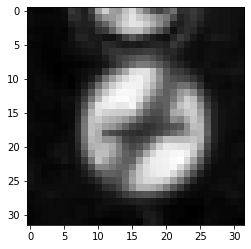

In [0]:
#rgb2gray redukuje kanały z 3 kanał do 1 (RGB do szarosci )
#plt.get_cmap('gray') - odcienie szarosci

plt.imshow( color.rgb2gray(X_train[0]),cmap= plt.get_cmap('gray'))

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [0]:
model = gen_cnn_v5((32,32,1),num_classes)
model_trained = train_model(model,X_train_gray,y_train,params_fit={})
predict(model_trained,X_test_gray,y_test)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.3712 - accuracy: 0.3213 - val_loss: 0.6890 - val_accuracy: 0.7671
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.6033 - accuracy: 0.8020 - val_loss: 0.1823 - val_accuracy: 0.9450
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2961 - accuracy: 0.9052 - val_loss: 0.0981 - val_accuracy: 0.9713
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1858 - accuracy: 0.9428 - val_loss: 0.0470 - val_accuracy: 0.9857
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1329 - accuracy: 0.9579 - val_loss: 0.0388 - val_accuracy: 0.9884


0.9489795918367347